# **DATA UNDERSTANDING**

## **Context**


Sebuah supplier bergerak di bidang jual-beli bahan makanan ingin mengetahui gambaran umum tentang bisnis yang sedang mereka jalankan. Terdapat sebuah database yang menunjukan detail dari proses transaksi. Dari database tersebut, supplier ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih dari saat ini.

## **Database Information**
Database yang dimiliki mempunyai 13 tabel, yaitu:
- supplier                   : Menyimpan informasi tentang data supplier/penjual.
- product                    : Menyimpan informasi tentang data jenis produk/bahan makanan.
- OrderDetails               : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
- Orders                     : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan.
- Employees                  : Menyimpan semua informasi karyawan serta struktur organisasi, seperti siapa melapor kepada siapa.
- Employees terrietories     : 
- Customers                  : Menyimpan informasi tentang data pelanggan/customer.
- CustomersDemographicc      : Menyimpan informasi tentang data
- CustomersCustomerDemo      : Menyimpan informasi tentang data
- terrietories               : Menyimpan informasi tentang data
- Categories                 : Menyimpan informasi tentang data
- Shippers                   : Menyimpan informasi tentang data 
- region                     : Menyimpan informasi tentang data

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.


# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``Northwind yang berfokus pada data supplier``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [65]:
import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [66]:
mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'tengah13',
    database = 'northwind'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [67]:
curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## **Data Detail Supplier**

 Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 4 tabel, yaitu tabel ```Suppliers```, ```Products```, ```OrderDetails```, dan ```Orders```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :

 - SupplierID       dari tabel Suppliers
 - CompanyName      dari tabel Suppliers
 - Address          dari tabel Suppliers
 - City             dari tabel Suppliers
 - Region           dari tabel Suppliers
 - Country          dari tabel Suppliers
 - p.ProductName    dari tabel Products
 - CategoryID       dari tabel Products
 - QuantityPerUnit  dari tabel Products
 - UnitsInStock     dari tabel Products
 - UnitsOnOrder     dari tabel Products
 - UnitPrice        dari tabel OrderDetails
 - Quantity         dari tabel OrderDetails
 - Discount         dari tabel OrderDetails
 - ShipCity         dari tabel Order
 - ShipRegion       dari tabel Order
 - OrderID          dari tabel Order
 - OrderDate        dari tabel Order
 - ShippedDate      dari tabel Order
 - RequiredDate     dari tabel Order

 Selain dari tabel, terdapat sebuah kolom juga yang dinamakan sellpricw yang merupakan selisih antara harga perunit dan discount; juga terdapat kolom yang bernama restStock yang merupakan hasil pengurangan antara quantityInStock dan quantity. 

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.
 

In [68]:
tabel1 = sql_table (
    '''
select s.SupplierID, s.CompanyName, s.Address, s.City, s.Region, s.Country,
    p.ProductName, p.CategoryID, p.QuantityPerUnit, p.UnitsInStock, p.UnitsOnOrder,
    od.UnitPrice, od.Quantity, od.Discount,
    o.ShipCity, o.ShipRegion, o.OrderID, o.OrderDate, o.ShippedDate, o.RequiredDate,
    round((od.UnitPrice - od.Discount),1) sellPrice, (od.Quantity - p.UnitsOnOrder) restStock
from suppliers s
left join products p on s.supplierID = p.supplierID
left join orderdetails od on p.ProductID = od.ProductID
left join orders o on od.OrderID = o.OrderID
    '''
)
tabel1.head()

,SupplierID,CompanyName,Address,City,Region,Country,ProductName,CategoryID,QuantityPerUnit,UnitsInStock,...,Quantity,Discount,ShipCity,ShipRegion,OrderID,OrderDate,ShippedDate,RequiredDate,sellPrice,restStock
0,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,...,45,0.0,Cunewalde,None,10285,1996-08-20,1996-08-26,1996-09-17,14.4,45
1,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,...,18,0.0,Albuquerque,NM,10294,1996-08-30,1996-09-05,1996-09-27,14.4,18
2,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,...,20,0.0,Portland,OR,10317,1996-09-30,1996-10-10,1996-10-28,14.4,20
3,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,...,15,0.0,Stuttgart,None,10348,1996-11-07,1996-11-15,1996-12-05,14.4,15
4,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,...,12,0.0,Mxico D.F.,None,10354,1996-11-14,1996-11-20,1996-12-12,14.4,12


## **Data Jenis Produk, Kuantitas, dan Total Harga Beli**

Data yang kedua ini merupakan informasi yang bisa menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini memuat jenis produk bahan makanan yang tersedia , lengkap dengan banyaknya jenis produk, kuantitas, serta harga belinya. Dari sini bisa dilihat gambaran apakah kuantitas akan memberikan pengaruh terhadap harga beli. Dari data ini juga bisa dilihat keadaan stock barang, serta bagaimana gambaran jika suatu saat ingin menambah, entah itu jenis produk ataupun kuantitas dengan mempertimbangkan harganya.

In [99]:
# Query 2 (Aggregating)

tabel2 = sql_table(
    '''
select 
	ProductName Nama_Produk, 
    count(ProductName) Jenis_Produk, 
    sum(UnitsInStock) JumlahUnit, sum(UnitPrice) HargaPerunit
from products
group by ProductName
order by jenis_Produk;
    '''
)

tabel2.head()

,Nama_Produk,Jenis_Produk,JumlahUnit,HargaPerunit
0,Alice Mutton,1,0,39.0000
1,Aniseed Syrup,1,13,10.0000
2,Boston Crab Meat,1,123,18.4000
3,Camembert Pierrot,1,19,34.0000
4,Carnarvon Tigers,1,42,62.5000


## **CTE / Window Function**
Dikarenakan ada data yang tidak digunakan karena nilainya 0 yaitu ``UnitsOnOrder`` dan ``Discount`` maka colomnya saya hapus

In [70]:
# Query 3 (CTE / Window Function)
tabel1.drop(['UnitsOnOrder', 'Discount'], axis=1, inplace = True)


In [71]:
tabel1.head()

,SupplierID,CompanyName,Address,City,Region,Country,ProductName,CategoryID,QuantityPerUnit,UnitsInStock,UnitPrice,Quantity,ShipCity,ShipRegion,OrderID,OrderDate,ShippedDate,RequiredDate,sellPrice,restStock
0,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,14.4000,45,Cunewalde,None,10285,1996-08-20,1996-08-26,1996-09-17,14.4,45
1,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,14.4000,18,Albuquerque,NM,10294,1996-08-30,1996-09-05,1996-09-27,14.4,18
2,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,14.4000,20,Portland,OR,10317,1996-09-30,1996-10-10,1996-10-28,14.4,20
3,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,14.4000,15,Stuttgart,None,10348,1996-11-07,1996-11-15,1996-12-05,14.4,15
4,1,Exotic Liquids,49 Gilbert St.,London,None,UK,Chai,1,10 boxes x 20 bags,39,14.4000,12,Mxico D.F.,None,10354,1996-11-14,1996-11-20,1996-12-12,14.4,12


# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **Data Anomalies**

## **Melihat Data Sekilas Dari General Info**

Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 3020 baris data dengan total 18 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, dan float. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat jomplang adalah pada ```region``` dan ```ShipRegion```. Kedua features tersebut kehilangan lebih dari 50% data. selain itu tidak ada kolom lain yang missing value

Fokus berikutnya tidak ada, karena datanya sudah bersih hanya missing value di ```region``` dan ```ShipRegion```.

## **Missing Values**
Telah dijelaskan sebelumnya, terdapat beberapa feature yang memang memiliki missing values. Yang paling jadi sorotan adalah ```region``` dan ```ShipRegion``` yang memiliki total missing value yang lebih dari 60%. Artinya, jika missing valuenya dihilangkan dengan melihat row atau barisnya, setengah dari data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya banyak informasi. Tentu saja hal tersebut tidak dibenarkan. Untuk mengatasi hal tersebut, maka kedua feature tersebut akan dihapus dan tidak akan dimasukkan ke dalam data yang akan dianalisis.

Sehingga, cara untuk mengatasinya cukup dengan melakukan drop data ```region``` dan ```ShipRegion```

In [72]:
# Check Missing Value Percentage

tabel1.isnull().sum()

SupplierID            0
CompanyName           0
Address               0
City                  0
Region             1424
Country               0
ProductName           0
CategoryID            0
QuantityPerUnit       0
UnitsInStock          0
UnitPrice             0
Quantity              0
ShipCity              0
ShipRegion         1299
OrderID               0
OrderDate             0
ShippedDate          73
RequiredDate          0
sellPrice             0
restStock             0
dtype: int64

## **Handling Anomalies**

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. Bagian pertama jelas akan dilakukan drop features ```region``` dan ```ShipRegion```. 

In [73]:
tabel1.drop(['Region', 'ShipRegion'], axis=1, inplace = True)

In [74]:
tabel1.isnull().sum()

SupplierID          0
CompanyName         0
Address             0
City                0
Country             0
ProductName         0
CategoryID          0
QuantityPerUnit     0
UnitsInStock        0
UnitPrice           0
Quantity            0
ShipCity            0
OrderID             0
OrderDate           0
ShippedDate        73
RequiredDate        0
sellPrice           0
restStock           0
dtype: int64

In [75]:
# Remove Missing Value 2

tabel1.dropna(inplace = True)

In [76]:
# Recheck Info

tabel1.isnull().sum()

SupplierID         0
CompanyName        0
Address            0
City               0
Country            0
ProductName        0
CategoryID         0
QuantityPerUnit    0
UnitsInStock       0
UnitPrice          0
Quantity           0
ShipCity           0
OrderID            0
OrderDate          0
ShippedDate        0
RequiredDate       0
sellPrice          0
restStock          0
dtype: int64

## **Recheck Missing Value Information**

Setelah melakukan proses drop missing value, baik itu drop terhadap features maupun row, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali, dan pada feature ```region``` dan ```ShipRegion```. sudah tidak ada juga (karena sudah di-drop). Untuk masing-masing feature juga sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

In [77]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SupplierID       2082 non-null   int64         
 1   CompanyName      2082 non-null   object        
 2   Address          2082 non-null   object        
 3   City             2082 non-null   object        
 4   Country          2082 non-null   object        
 5   ProductName      2082 non-null   object        
 6   CategoryID       2082 non-null   int64         
 7   QuantityPerUnit  2082 non-null   object        
 8   UnitsInStock     2082 non-null   int64         
 9   UnitPrice        2082 non-null   object        
 10  Quantity         2082 non-null   int64         
 11  ShipCity         2082 non-null   object        
 12  OrderID          2082 non-null   int64         
 13  OrderDate        2082 non-null   datetime64[ns]
 14  ShippedDate      2082 non-null   datetim

## **Feature 'ProcessingDate'**

Data awal menunjukan terdapat 2 features yang merupakan tipe data datetime. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua features tersebut. Sebelumnya, kita perlu tahu dulu definisi dari kedua tabel tersebut. RequiredDate secara singkat dapat diartikan sebagai waktu atau kapan barang tersebut dibutuhkan, sedangkat ShippedDate adalah waktu dikirimkannya barang tersebut. 

Melihat kedua definisi tersebut, sebuah informasi dapat diambil, yakni seberapa lama waktu proses barangnya dari waktu pengiriman hingga dibutuhkan. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan pengurangan antara requiredDate dan juga shippedDate. Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa selisih atau lamanya waktu proses tersebut dalam satuan hari.

In [78]:
# Add New Column (Processing Day)

tabel1['ProcessingDate'] = tabel1['RequiredDate'] - tabel1['ShippedDate']
tabel1.sample(5)

,SupplierID,CompanyName,Address,City,Country,ProductName,CategoryID,QuantityPerUnit,UnitsInStock,UnitPrice,Quantity,ShipCity,OrderID,OrderDate,ShippedDate,RequiredDate,sellPrice,restStock,ProcessingDate
787,11,Heli Swaren GmbH & Co. KG,Tiergartenstrae 5,Berlin,Germany,Gumbr Gummibrchen,3,100 - 250 g bags,15,24.9000,2,Torino,10422,1997-01-22,1997-01-31,1997-02-19,24.9,2,19 days
416,7,"Pavlova, Ltd.",74 Rose St.\r\nMoonie Ponds,Melbourne,Australia,Pavlova,3,32 - 500 g boxes,29,17.4500,20,Leipzig,10779,1997-12-16,1998-01-14,1998-01-13,17.4,20,-1 days
2044,28,Gai pturage,"Bat. B\r\n3, rue des Alpes",Annecy,France,Camembert Pierrot,4,15 - 300 g rounds,19,27.2000,20,Lisboa,10464,1997-03-04,1997-03-14,1997-04-01,27.2,20,18 days
1361,18,Aux joyeux ecclsiastiques,"203, Rue des Francs-Bourgeois",Paris,France,Cte de Blaye,1,12 - 75 cl bottles,17,210.8000,10,Strasbourg,10360,1996-11-22,1996-12-02,1996-12-20,210.8,10,18 days
1519,20,Leka Trading,"471 Serangoon Loop, Suite #402",Singapore,Singapore,Singaporean Hokkien Fried Mee,5,32 - 1 kg pkgs.,26,14.0000,12,Graz,10776,1997-12-15,1997-12-18,1998-01-12,14.0,12,25 days


## **Unique Value 'ProcessingDate'**

Oke, setelah membuat sebuah kolom baru yang bernama ProcessingDate sebagaimana yang sudah didefinisikan sebelumnya, mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

In [79]:
# Check Data Anomalies in Date Time Fomrat
tabel1['ProcessingDate'].value_counts()

21 days     227
22 days     191
23 days     165
25 days     160
19 days     159
24 days     158
26 days     145
20 days     139
18 days      98
16 days      39
7 days       37
10 days      37
27 days      35
17 days      34
5 days       31
36 days      31
8 days       30
4 days       27
9 days       24
35 days      23
34 days      23
11 days      22
6 days       21
-1 days      20
13 days      18
-7 days      16
39 days      16
-6 days      15
32 days      15
15 days      15
3 days       11
0 days       10
-4 days       8
14 days       8
-5 days       6
33 days       6
-2 days       6
1 days        6
30 days       6
37 days       5
-16 days      5
12 days       5
2 days        5
-18 days      4
-9 days       4
41 days       3
38 days       3
-8 days       2
-11 days      2
-3 days       2
28 days       2
-23 days      1
-17 days      1
Name: ProcessingDate, dtype: int64

## **Anomali Pada Processing Date**

Melihat output unique values beserta dengan banyaknya data di setiap unique values tersebut, apakah terlihat sesuatu yang aneh? Yap benar, terdapat sebuah waktu yang menunjukan nilai minus, -1 days terdapat 20 data di dalamnya, -3 Days terdapat 2 data di dalamnya, -23 Days terdapat 1 data di dalamnya, -17 Days terdapat 1 data di dalamnya. Ada apa? Sebenarnya ada 2 asumsi yang bisa diambil. Asumsi pertama adalah murni kesalahan input saat memasukan ke dalam database, atau asumsi yang kedua adalah pengirimannya mengalami keterlambatan. 

Untuk asumsi yang pertama, cara mengatasinya cukup dengan drop 18 data yang salah input. Dengan kata lain, kita menganggap bahwa data tersebut 'salah' dan dapat dibuang (karena jumlahnya yang tidak banyak). Untuk asumsi kedua, data ini bisa saja dipertahankan dan bisa dilakukan analisis lebih lanjut untuk mengetahui letak permasalahannya.

Di sini, asumsi yang akan digunakan adalah asumsi yang kedua, yaitu kita akan mengasumsikan terdapat keterlambatan dalam pengiriman. Nantinya, kita akan coba melakukan analisis untuk data ini.

In [80]:
# Handling Date Time Format Anomalies (Check Data First)

tabel1[tabel1['ProcessingDate'] == '-1 days']

,SupplierID,CompanyName,Address,City,Country,ProductName,CategoryID,QuantityPerUnit,UnitsInStock,UnitPrice,Quantity,ShipCity,OrderID,OrderDate,ShippedDate,RequiredDate,sellPrice,restStock,ProcessingDate
416,7,"Pavlova, Ltd.",74 Rose St.\r\nMoonie Ponds,Melbourne,Australia,Pavlova,3,32 - 500 g boxes,29,17.4500,20,Leipzig,10779,1997-12-16,1998-01-14,1998-01-13,17.4,20,-1 days
435,7,"Pavlova, Ltd.",74 Rose St.\r\nMoonie Ponds,Melbourne,Australia,Alice Mutton,6,20 - 1 kg tins,0,31.2000,40,Charleroi,10302,1996-09-10,1996-10-09,1996-10-08,31.2,40,-1 days
444,7,"Pavlova, Ltd.",74 Rose St.\r\nMoonie Ponds,Melbourne,Australia,Alice Mutton,6,20 - 1 kg tins,0,39.0000,25,London,10523,1997-05-01,1997-05-30,1997-05-29,39.0,25,-1 days
595,8,"Specialty Biscuits, Ltd.",29 King's Way,Manchester,UK,Sir Rodney's Marmalade,3,30 gift boxes,40,81.0000,15,London,10523,1997-05-01,1997-05-30,1997-05-29,81.0,15,-1 days
715,10,Refrescos Americanas LTDA,Av. das Americanas 12.890,So Paulo,Brazil,Guaran Fantstica,1,12 - 355 ml cans,20,3.6000,12,Lule,10280,1996-08-14,1996-09-12,1996-09-11,3.6,12,-1 days
823,12,Plutzer Lebensmittelgromrkte AG,Bogenallee 51,Frankfurt,Germany,Rssle Sauerkraut,7,25 - 825 g cans,26,36.4000,28,Charleroi,10302,1996-09-10,1996-10-09,1996-10-08,36.4,28,-1 days
917,12,Plutzer Lebensmittelgromrkte AG,Bogenallee 51,Frankfurt,Germany,Rhnbru Klosterbier,1,24 - 0.5 l bottles,125,6.2000,30,Lule,10280,1996-08-14,1996-09-12,1996-09-11,6.2,30,-1 days
1139,15,Norske Meierier,Hatlevegen 5,Sandvika,Norway,Geitost,4,500 g,112,2.0000,24,Lander,10271,1996-08-01,1996-08-30,1996-08-29,2.0,24,-1 days
1203,15,Norske Meierier,Hatlevegen 5,Sandvika,Norway,Flotemysost,4,10 - 500 g pkgs.,26,17.2000,30,Oulu,10320,1996-10-03,1996-10-18,1996-10-17,17.2,30,-1 days
1341,17,Svensk Sjfda AB,Brovallavgen 231,Stockholm,Sweden,Gravad lax,8,12 - 500 g pkgs.,11,26.0000,18,London,10523,1997-05-01,1997-05-30,1997-05-29,26.0,-32,-1 days


## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [81]:
# Clean Data

tabel1.sample(20)

,SupplierID,CompanyName,Address,City,Country,ProductName,CategoryID,QuantityPerUnit,UnitsInStock,UnitPrice,Quantity,ShipCity,OrderID,OrderDate,ShippedDate,RequiredDate,sellPrice,restStock,ProcessingDate
1082,14,Formaggi Fortini s.r.l.,"Viale Dante, 75",Ravenna,Italy,Gorgonzola Telino,4,12 - 100 g pkgs,0,12.5000,15,Colchester,11016,1998-04-10,1998-04-13,1998-05-08,12.5,-55,25 days
2025,28,Gai pturage,"Bat. B\r\n3, rue des Alpes",Annecy,France,Raclette Courdavault,4,5 kg pkg.,79,55.0000,18,rhus,10994,1998-04-02,1998-04-09,1998-04-16,55.0,18,7 days
106,2,New Orleans Cajun Delights,P.O. Box 78934,New Orleans,USA,Chef Anton's Cajun Seasoning,2,48 - 6 oz jars,53,22.0000,12,Lule,10654,1997-09-02,1997-09-11,1997-09-30,22.0,12,19 days
1984,28,Gai pturage,"Bat. B\r\n3, rue des Alpes",Annecy,France,Raclette Courdavault,4,5 kg pkg.,79,44.0000,40,Boise,10324,1996-10-08,1996-10-10,1996-11-05,44.0,40,26 days
133,2,New Orleans Cajun Delights,P.O. Box 78934,New Orleans,USA,Louisiana Fiery Hot Pepper Sauce,2,32 - 8 oz bottles,76,16.8000,35,Rio de Janeiro,10447,1997-02-14,1997-03-07,1997-03-14,16.8,35,7 days
50,1,Exotic Liquids,49 Gilbert St.,London,UK,Chang,1,24 - 12 oz bottles,17,15.2000,20,I. de Margarita,10485,1997-03-25,1997-03-31,1997-04-08,15.2,-20,8 days
519,7,"Pavlova, Ltd.",74 Rose St.\r\nMoonie Ponds,Melbourne,Australia,Outback Lager,1,24 - 355 ml bottles,15,12.0000,30,Tsawassen,10389,1996-12-20,1996-12-24,1997-01-17,12.0,20,24 days
675,8,"Specialty Biscuits, Ltd.",29 King's Way,Manchester,UK,Scottish Longbreads,3,10 boxes x 8 pieces,6,12.5000,2,Madrid,11013,1998-04-09,1998-04-10,1998-05-07,12.5,-8,27 days
560,8,"Specialty Biscuits, Ltd.",29 King's Way,Manchester,UK,Teatime Chocolate Biscuits,3,10 boxes x 12 pieces,25,7.3000,15,Mnster,10438,1997-02-06,1997-02-14,1997-03-06,7.3,15,20 days
176,3,Grandma Kelly's Homestead,707 Oxford Rd.,Ann Arbor,USA,Uncle Bob's Organic Dried Pears,7,12 - 1 lb pkgs.,15,24.0000,15,Albuquerque,10262,1996-07-22,1996-07-25,1996-08-19,24.0,15,25 days


## **General Info Cleaned Data**

In [82]:
# Check Some Info

listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtype, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,SupplierID,int64,2082,0,0.0,29,"[17, 10]"
1,CompanyName,object,2082,0,0.0,29,"[Leka Trading, Gai pturage]"
2,Address,object,2082,0,0.0,29,"[Viale Dante, 75, 92 Setsuko\r\nChuo-ku]"
3,City,object,2082,0,0.0,29,"[Montceau, So Paulo]"
4,Country,object,2082,0,0.0,17,"[France, Spain]"
5,ProductName,object,2082,0,0.0,77,"[Escargots de Bourgogne, Konbu]"
6,CategoryID,int64,2082,0,0.0,8,"[3, 1]"
7,QuantityPerUnit,object,2082,0,0.0,70,"[100 - 100 g pieces, 24 - 250 g jars]"
8,UnitsInStock,int64,2082,0,0.0,51,"[95, 120]"
9,UnitPrice,object,2082,0,0.0,116,"[21.3500, 30.0000]"


In [83]:
tabel1['UnitPrice'] = tabel1['UnitPrice'].apply(np.int64)

In [84]:
q1 = tabel1['UnitPrice'].describe()['25%']
q3 = tabel1['UnitPrice'].describe()['75%']

iqr = q3 -q1
outlier_index = tabel1[(tabel1['UnitPrice'] < q1 - (1.5 * iqr)) | (tabel1['UnitPrice']> q3 + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['UnitPrice'] > q1 - (1.5 * iqr)) & (tabel1['UnitPrice']< q3 + (1.5 * iqr)) ].index
tabel1.loc[outlier_index]

,SupplierID,CompanyName,Address,City,Country,ProductName,CategoryID,QuantityPerUnit,UnitsInStock,UnitPrice,Quantity,ShipCity,OrderID,OrderDate,ShippedDate,RequiredDate,sellPrice,restStock,ProcessingDate
218,4,Tokyo Traders,9-8 Sekimai\r\nMusashino-shi,Tokyo,Japan,Mishi Kobe Niku,6,18 - 500 g pkgs.,29,77,20,Resende,10420,1997-01-21,1997-01-27,1997-02-18,77.6,20,22 days
219,4,Tokyo Traders,9-8 Sekimai\r\nMusashino-shi,Tokyo,Japan,Mishi Kobe Niku,6,18 - 500 g pkgs.,29,97,16,Cunewalde,10515,1997-04-23,1997-05-23,1997-05-07,97.0,16,-16 days
220,4,Tokyo Traders,9-8 Sekimai\r\nMusashino-shi,Tokyo,Japan,Mishi Kobe Niku,6,18 - 500 g pkgs.,29,97,50,Cork,10687,1997-09-30,1997-10-30,1997-10-28,97.0,50,-2 days
221,4,Tokyo Traders,9-8 Sekimai\r\nMusashino-shi,Tokyo,Japan,Mishi Kobe Niku,6,18 - 500 g pkgs.,29,97,6,Seattle,10693,1997-10-06,1997-10-10,1997-10-20,97.0,6,10 days
222,4,Tokyo Traders,9-8 Sekimai\r\nMusashino-shi,Tokyo,Japan,Mishi Kobe Niku,6,18 - 500 g pkgs.,29,97,3,London,10848,1998-01-23,1998-01-29,1998-02-20,97.0,3,22 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,18,Aux joyeux ecclsiastiques,"203, Rue des Francs-Bourgeois",Paris,France,Cte de Blaye,1,12 - 75 cl bottles,17,263,60,Cunewalde,10865,1998-02-02,1998-02-12,1998-02-16,263.5,60,4 days
1378,18,Aux joyeux ecclsiastiques,"203, Rue des Francs-Bourgeois",Paris,France,Cte de Blaye,1,12 - 75 cl bottles,17,263,40,Albuquerque,10889,1998-02-16,1998-02-23,1998-03-16,263.5,40,21 days
1379,18,Aux joyeux ecclsiastiques,"203, Rue des Francs-Bourgeois",Paris,France,Cte de Blaye,1,12 - 75 cl bottles,17,263,5,Paris,10964,1998-03-20,1998-03-24,1998-04-17,263.5,5,24 days
1380,18,Aux joyeux ecclsiastiques,"203, Rue des Francs-Bourgeois",Paris,France,Cte de Blaye,1,12 - 75 cl bottles,17,263,60,Rio de Janeiro,10981,1998-03-27,1998-04-02,1998-04-24,263.5,60,22 days


# **DATA VISUALIZATION & STATISTICS**

## **Top 5 Suppliers**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang minim.

In [85]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
fig = px.bar(tabel1['CompanyName'].value_counts().head(),
            title = 'Loyal Company')
fig.show()

Produksi dalam restoran merupakan produksi yang terus menerus harus tersedia dengan permintaan yang bersifat tidak tentu atau tidak pasti berdasarkan permintaan komsumen. Ketersediaan bahan mentah sangat diutamakan untuk mendukung proses produksi. Dari sekian banyak produk bahan mentah yang harus diorder, manajemen pembelian sering kesulitan dalam memilih pemasok bahan baku yang tepat untuk setiap proses order.
Mari kita lihat data nama perusahan supplier yang sering melakukan order bahan makanan. perusahan yang serin melakukan pembelian adalah Plutzer dan Pavlova dengan total transaksi lebih dari 150 kali. Artinya, kedua perusahaan ini adalah pembeli setia, sementara Jumlah transaksi yang dilakukan oleh ketiga perusahaan lain masih kalah jauh dari 2 perusahaan sebelumnya.



## **Negara Pemesan Bahan Makanan Terbanyak**

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



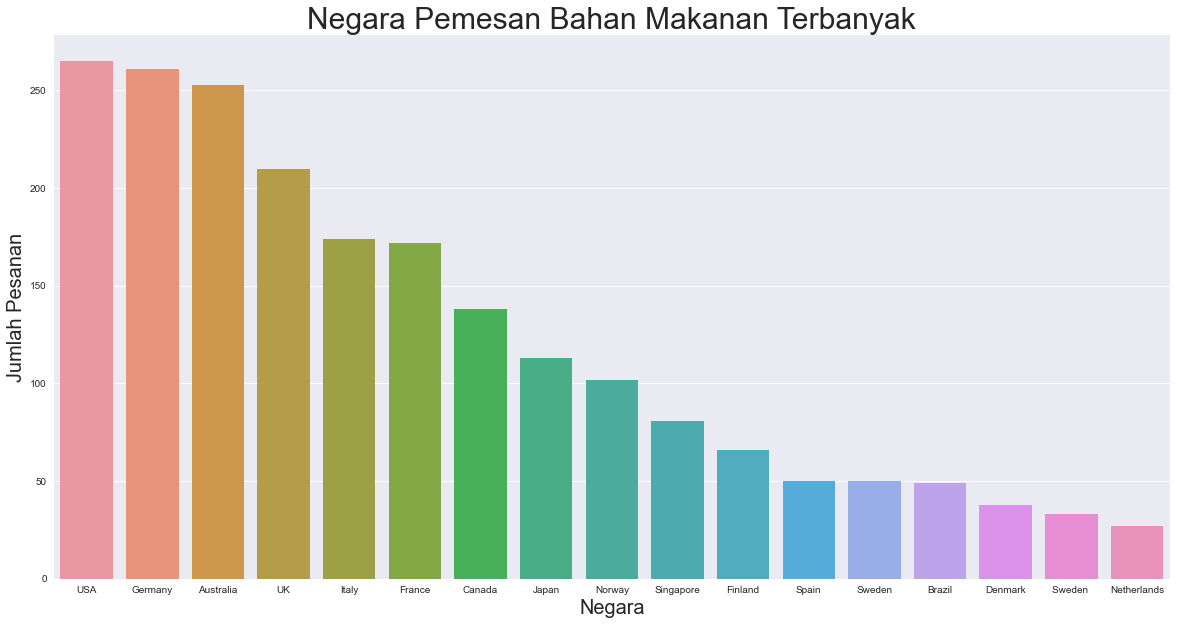

In [87]:
plt.figure(figsize=(20,10))
sns.countplot(tabel1['Country'],
            order = tabel1['Country'].value_counts().index)
plt.xlabel('Negara', size = 20)
plt.ylabel('Jumlah Pesanan', size = 20)
plt.title ('Negara Pemesan Bahan Makanan Terbanyak', size = 30)
plt.show()

Setelah sebelumnya telah mengetahui perusahan yang sering membeli atau loyal, berikutnya mari ktia lihat negara mana saja yang menjadi pemesan bahan makanan terbanyak. Jika melihat data dari grafik di atas, terlihat jelas bahwa USA atau Amerika Serikat menjadi negara tujuan pemesan terbanyak. Tentu saja hal tersebut sangat mungkin diakrenakan status Amerika sebagai negara adidaya yang pastinya akan lebih banyak menjadi pemasok bahan makanan daripada negara-negara lainnya. Luar biasanya, tingkat pembelian yang berasal dari negara USA mencapai lebih dari 250 yang berarti 2 kali lipat lebih banyak dari negara lain.

Jika mempertimbangkan hal tersebut, maka perusahaan pemasok bahan makanan ini harus sangat mempertimbangkan untuk paling tidak membangun pusat produksi dan kantor di 3 negara, yaitu USA, Germany, dan Australia. Tujuannya jelas, yaitu agar proses penujalan dan distribusi dari negara tujuan pembeli dapat dilakukan dalam waktu cepat. 

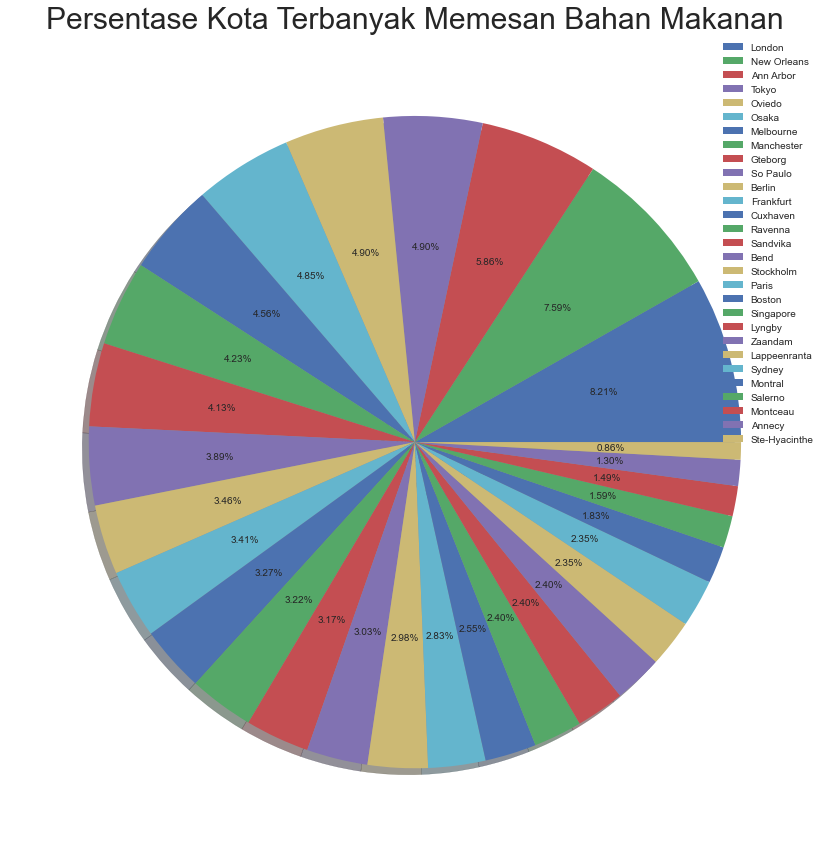

In [88]:
# Pie Chart Status

plt.style.use('seaborn')
plt.figure(figsize=(20,15))
plt.pie(tabel1['City'].value_counts().values, 
        autopct='%.2f%%', explode= (None), shadow=True)
plt.title ('Persentase Kota Terbanyak Memesan Bahan Makanan', size = 30)
plt.legend(tabel1['City'].unique())
plt.show()

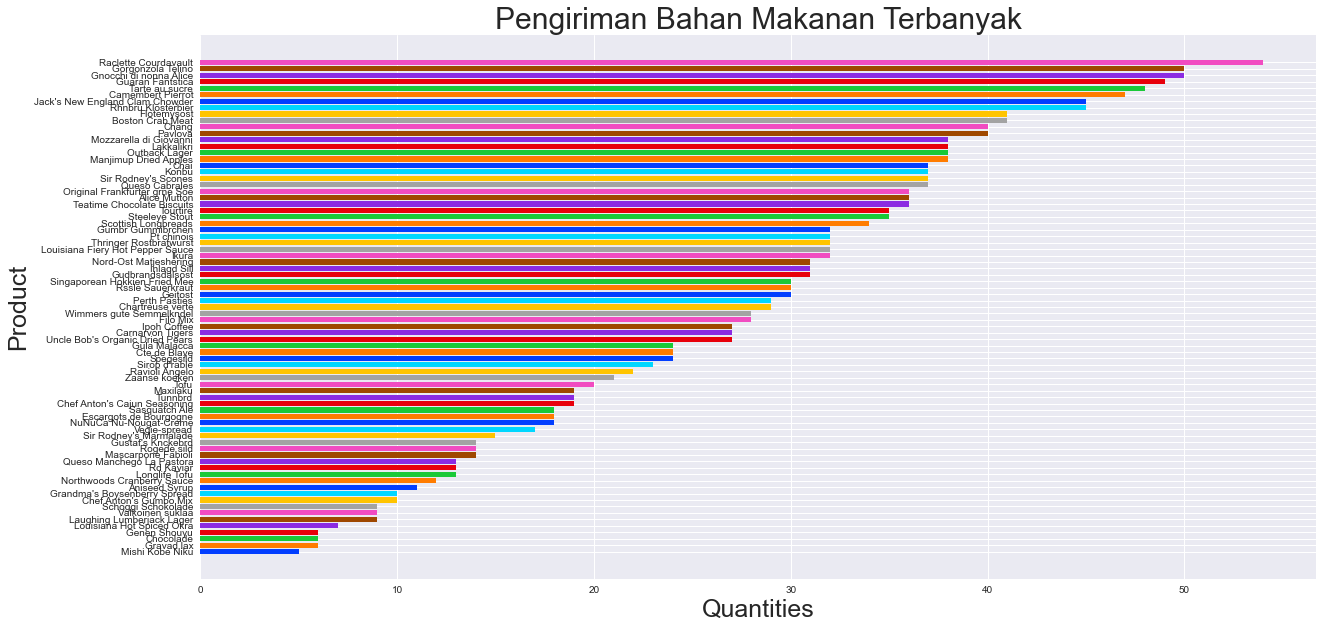

In [89]:
# Pengiriman Bahan Makanan Terbanyak

productQuanti = tabel1[['ProductName', 'ShipCity']].groupby(['ProductName']).count().sort_values('ShipCity')
x = productQuanti.index
y = productQuanti['ShipCity']

plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.barh(x,y, color = sns.color_palette('bright'))
plt.title('Pengiriman Bahan Makanan Terbanyak', size = 30)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)
plt.show()

## **Perbedaan Harga**

In [90]:
# Uji Perbandingan Nilai UnitPrice Antar Setiap Product (Normalitas)

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['UnitPrice'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


In [96]:
# Uji Perbandingan Nilai UnitPrice Antar Setiap negara (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    tabel1[tabel1['Country'] == 'USA']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Germany']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Australia']['UnitPrice'],
    tabel1[tabel1['Country'] == 'UK']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Italy']['UnitPrice'],
    tabel1[tabel1['Country'] == 'France']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Canada']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Japan']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Norway']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Singapore']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Finland']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Spain']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Sweden']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Brazil']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Denmark']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Netherlands']['UnitPrice']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median UnitPrice pada Setiap Negara Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median UnitPrice pada Setiap Negara Yang Ada')

Tolak H0 Karena P-Value (0.0 < 5%)
Terdapat Perbedaan Nilai Median UnitPrice pada Setiap Negara Yang Ada


## **Hubungan Quantity PerUnit, Unit Price, Units In Stock**

<AxesSubplot:>

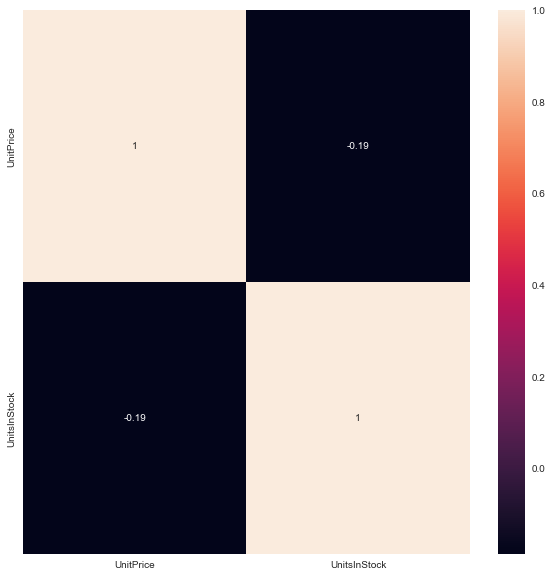

In [ ]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(tabel1[['QuantityPerUnit', 'UnitPrice', 'UnitsInStock']].corr('spearman'), annot=True)
	